# Exploring Crash Patterns and Preventive Strategies for vehicle crashes

## Group Members: Meghana Kota, Harshad Gupta Pasumarthy

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
df = pd.read_excel('Crash Data - Chicago.xlsx')

## Understanding chicago crash data

In [3]:
df.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,2025-01-15 13:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,0.0,1.0,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493)
1,0173d218723a1d608d77b7142ca9b9a4afd7463e824162...,Y,2023-09-23 10:39:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,10,7,9,42.010386,-87.670011,POINT (-87.67001097385 42.010385766289)
2,204c3ca48ff3cdf0737e7f10b54ef5f8c49fbe30b5e53e...,NaN,2024-12-04 17:39:00,30,UNKNOWN,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,17,4,12,NaN,NaN,NaN
3,0235f4b4460f50115c7f6cb0d2bedeea7ce92b9b0f5943...,NaN,2025-01-15 18:40:00,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,0.0,0.0,2.0,0.0,18,4,1,41.846038,-87.724761,POINT (-87.724761370522 41.846037568964)
4,01c36d50980b25ab3086fe56ddebe44aad49e0d51355ff...,NaN,2023-08-21 19:48:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,2.0,0.0,19,2,8,41.883206,-87.729766,POINT (-87.729766147856 41.88320561022)


In [4]:
df.shape

(540032, 48)

In [5]:
null_percentage = (df.isnull().sum()/df.shape[0])*100

In [6]:
df.shape

(540032, 48)

## Data Cleaning

In [7]:
# Drop columns with more than 5% missing values
df_cleaned = df.drop(columns=null_percentage[null_percentage > 5].index)

In [8]:
# Separate categorical and numerical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns  
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns 

# Filling the categorical columns with 'Unknown'
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('Unknown')

# Filling the numeric columns with ceil(mean)
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(lambda col: np.ceil(col.mean()) if col.isnull().sum() > 0 else col)



In [9]:
(df_cleaned.isnull().sum()/df_cleaned.shape[0])*100

CRASH_RECORD_ID                  0.0
CRASH_DATE                       0.0
POSTED_SPEED_LIMIT               0.0
TRAFFIC_CONTROL_DEVICE           0.0
DEVICE_CONDITION                 0.0
WEATHER_CONDITION                0.0
LIGHTING_CONDITION               0.0
FIRST_CRASH_TYPE                 0.0
TRAFFICWAY_TYPE                  0.0
ALIGNMENT                        0.0
ROADWAY_SURFACE_COND             0.0
ROAD_DEFECT                      0.0
REPORT_TYPE                      0.0
CRASH_TYPE                       0.0
DAMAGE                           0.0
DATE_POLICE_NOTIFIED             0.0
PRIM_CONTRIBUTORY_CAUSE          0.0
SEC_CONTRIBUTORY_CAUSE           0.0
STREET_NO                        0.0
STREET_DIRECTION                 0.0
STREET_NAME                      0.0
BEAT_OF_OCCURRENCE               0.0
NUM_UNITS                        0.0
MOST_SEVERE_INJURY               0.0
INJURIES_TOTAL                   0.0
INJURIES_FATAL                   0.0
INJURIES_INCAPACITATING          0.0
I

In [10]:
df_cleaned.describe()

,CRASH_DATE,POSTED_SPEED_LIMIT,DATE_POLICE_NOTIFIED,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,540032,540032.000000,540032,540032.000000,540032.000000,540032.000000,540032.0,540032.0,540032.0,540032.0,540032.0,540032.0,540032.0,540032.000000,540032.000000,540032.000000,540032.0,540032.0
mean,2022-08-16 15:13:56.958290432,28.548242,2022-08-17 05:19:42.556589568,3764.457241,1244.657898,2.039951,1.0,1.0,1.0,1.0,1.0,2.0,0.0,13.208817,4.121413,6.540170,42.0,-87.0
min,2020-01-01 00:00:00,0.000000,2020-01-01 00:10:00,0.000000,111.000000,1.000000,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.000000,1.000000,1.000000,42.0,-87.0
25%,2021-06-06 12:00:00,30.000000,2021-06-07 07:49:45,1354.000000,722.000000,2.000000,1.0,1.0,1.0,1.0,1.0,2.0,0.0,9.000000,2.000000,4.000000,42.0,-87.0
50%,2022-08-25 15:50:30,30.000000,2022-08-26 09:57:30,3301.000000,1134.000000,2.000000,1.0,1.0,1.0,1.0,1.0,2.0,0.0,14.000000,4.000000,7.000000,42.0,-87.0
75%,2023-11-10 12:00:00,30.000000,2023-11-10 21:52:30,5611.000000,1814.000000,2.000000,1.0,1.0,1.0,1.0,1.0,2.0,0.0,17.000000,6.000000,9.000000,42.0,-87.0
max,2025-02-01 00:21:00,70.000000,2025-02-01 00:25:00,13799.000000,6100.000000,18.000000,1.0,1.0,1.0,1.0,1.0,2.0,0.0,23.000000,7.000000,12.000000,42.0,-87.0
std,NaN,5.661867,NaN,2855.379149,700.595808,0.472131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.651742,1.988552,3.418649,0.0,0.0


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540032 entries, 0 to 540031
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                540032 non-null  object        
 1   CRASH_DATE                     540032 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             540032 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         540032 non-null  object        
 4   DEVICE_CONDITION               540032 non-null  object        
 5   WEATHER_CONDITION              540032 non-null  object        
 6   LIGHTING_CONDITION             540032 non-null  object        
 7   FIRST_CRASH_TYPE               540032 non-null  object        
 8   TRAFFICWAY_TYPE                540032 non-null  object        
 9   ALIGNMENT                      540032 non-null  object        
 10  ROADWAY_SURFACE_COND           540032 non-null  object        
 11  

In [12]:
df_cleaned.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [13]:
df_cleaned.shape

(540032, 37)

## Exploratory Data Analysis

### 1. Number of Crashes per Year (2020–2024)

C:\Users\kotam\AppData\Local\Temp\ipykernel_85340\3204900515.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_cleaned, x='year', palette=palette)


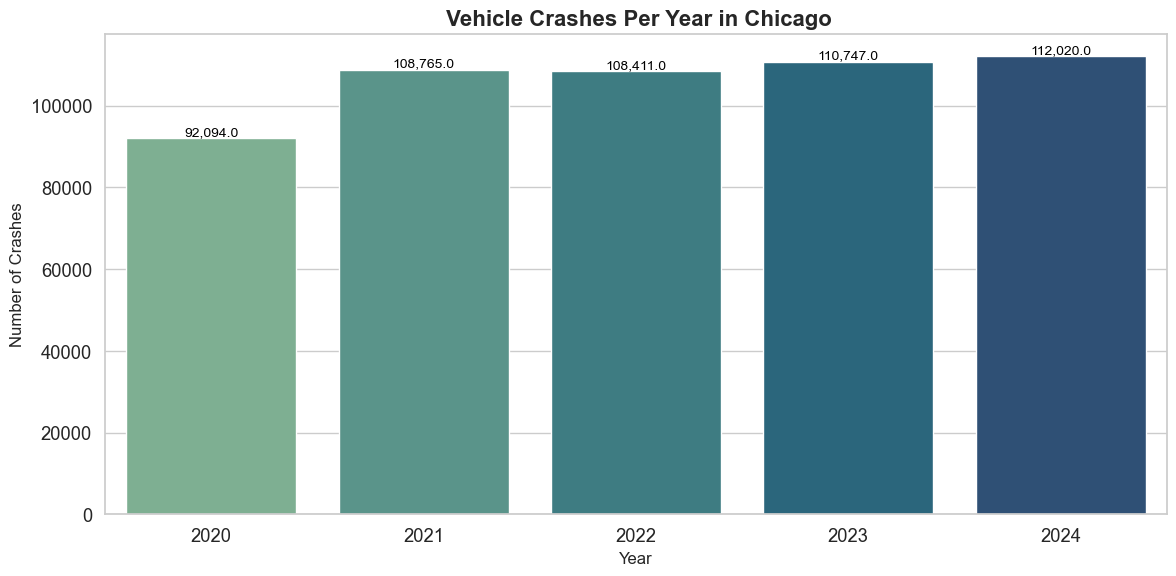

In [14]:
# Extract year from CRASH_DATE
df_cleaned['year'] = df_cleaned['CRASH_DATE'].dt.year

# Filter out 2025 data
df_cleaned = df_cleaned[df_cleaned['year'] != 2025]

# Set plot style
sns.set(style="whitegrid", font_scale=1.2)

# Create a color palette
palette = sns.color_palette("crest", len(df_cleaned['year'].unique()))

# Create the figure
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_cleaned, x='year', palette=palette)

# Add labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title(" Vehicle Crashes Per Year in Chicago", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)

# Enhance layout
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


### 2. Speed Limits Where Crashes Occurred

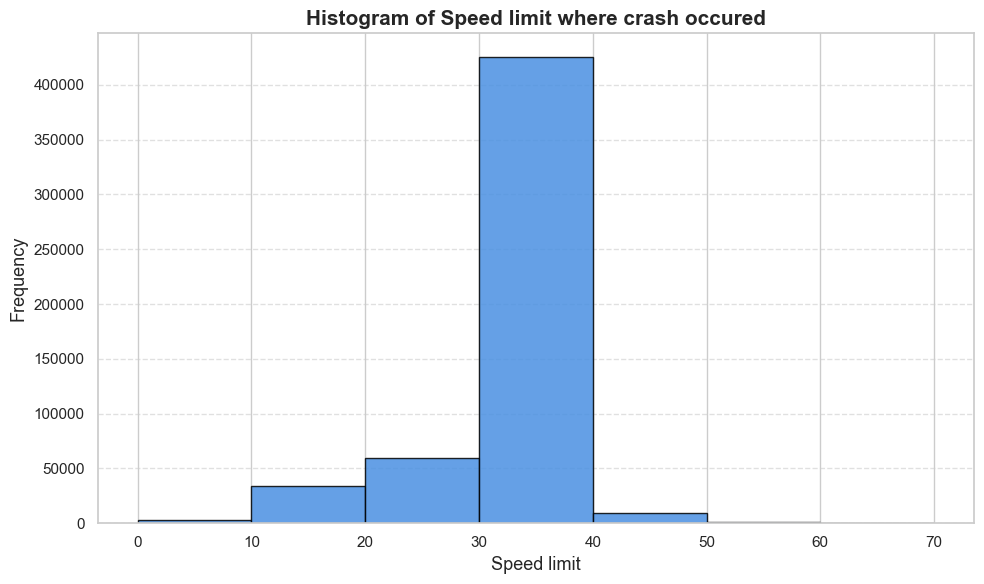

In [15]:
# Set a modern style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
plt.hist(
    df_cleaned['POSTED_SPEED_LIMIT'],
    bins=7,
    color='#4A90E2',  # pleasant blue tone
    edgecolor='black',
    alpha=0.85
)

# Add labels and title

plt.xlabel('Speed limit', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histogram of Speed limit where crash occured', fontsize=15, fontweight='bold')

# Add grid for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tweak ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add tight layout
plt.tight_layout()
plt.show()


### 3. Top 10 Contributory Causes of Crashes

C:\Users\kotam\AppData\Local\Temp\ipykernel_85340\2188265513.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_causes.values, y=top_10_causes.index, palette="Blues_d")


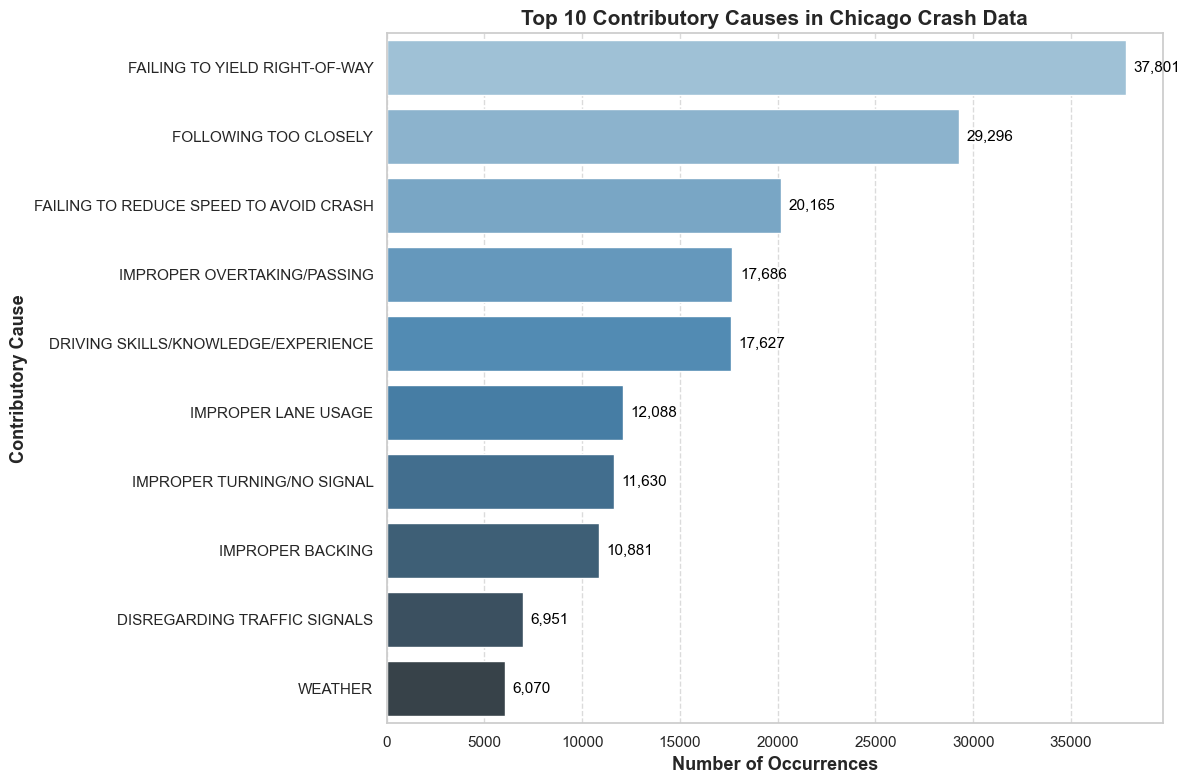

In [16]:
# Combine both columns into a single Series
combined_causes = pd.concat([df_cleaned['PRIM_CONTRIBUTORY_CAUSE'], df_cleaned['SEC_CONTRIBUTORY_CAUSE']])

# Count occurrences (halved to avoid double counting)
cause_counts = combined_causes.value_counts() / 2

# Remove irrelevant categories
cause_counts = cause_counts.drop(["UNABLE TO DETERMINE", "NOT APPLICABLE"], errors='ignore')

# Get top 10 causes (descending order for top-down bar chart)
top_10_causes = cause_counts.head(10).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_causes.values, y=top_10_causes.index, palette="Blues_d")

# Add value labels to bars
for i, v in enumerate(top_10_causes.values):
    ax.text(v + max(top_10_causes.values) * 0.01, i, f'{int(v):,}', color='black', va='center', fontsize=11)

# Labels and title
plt.xlabel("Number of Occurrences", fontsize=13, fontweight='bold')
plt.ylabel("Contributory Cause", fontsize=13, fontweight='bold')
plt.title("Top 10 Contributory Causes in Chicago Crash Data", fontsize=15, fontweight='bold')

# Grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


### 4. Crash Severity Distribution

C:\Users\kotam\AppData\Local\Temp\ipykernel_85340\4074407008.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=prime_cause_counts.values, y=prime_cause_counts.index, palette="Reds_r")


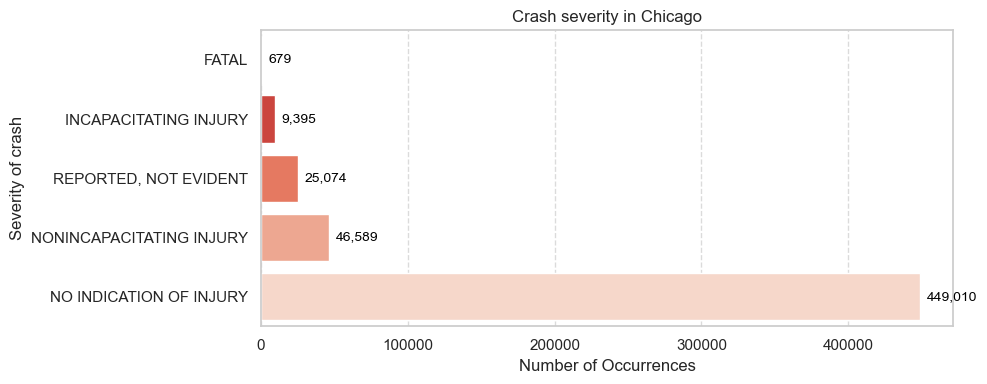

In [17]:
# Count most severe injuries, excluding "Unknown"
prime_cause_counts = df_cleaned['MOST_SEVERE_INJURY'].value_counts()
prime_cause_counts = prime_cause_counts.drop("Unknown", errors='ignore')

# Sort for ascending horizontal bars
prime_cause_counts = prime_cause_counts.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=prime_cause_counts.values, y=prime_cause_counts.index, palette="Reds_r")

# Add value labels
for i, v in enumerate(prime_cause_counts.values):
    ax.text(v + max(prime_cause_counts.values) * 0.01, i, f'{int(v):,}', color='black', va='center', fontsize=10)

# Labels and title
plt.xlabel("Number of Occurrences")
plt.ylabel("Severity of crash")
plt.title("Crash severity in Chicago")

# Grid and layout tweaks
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


### 5. Monthly Distribution of Crashes

C:\Users\kotam\AppData\Local\Temp\ipykernel_85340\2858569272.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=month_counts.index, y=month_counts.values, palette='Blues_d')


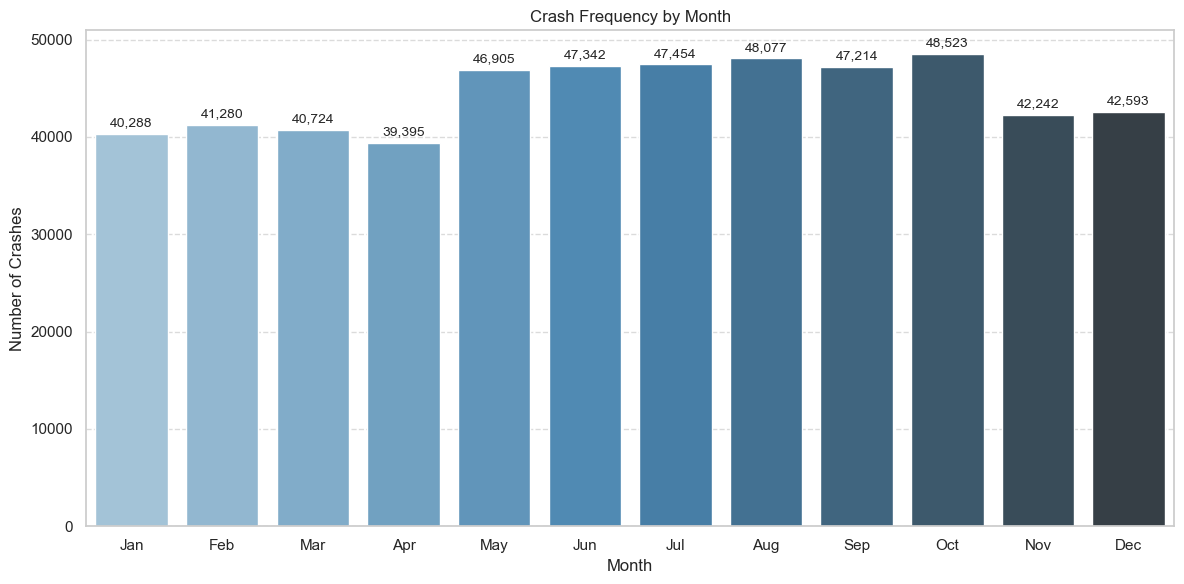

In [18]:
# Count crashes per month (ensure it's sorted by calendar order)
month_counts = df_cleaned['CRASH_MONTH'].value_counts().sort_index()

# Month labels in calendar order
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=month_counts.index, y=month_counts.values, palette='Blues_d')

# Add value labels
for i, v in enumerate(month_counts.values):
    ax.text(i, v + max(month_counts.values) * 0.01, f'{int(v):,}', ha='center', va='bottom', fontsize=10)

# Set custom x-tick labels
plt.xticks(ticks=range(12), labels=month_labels)

# Labels and title
plt.title('Crash Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


### 6. Hourly Distribution of Crashes

C:\Users\kotam\AppData\Local\Temp\ipykernel_85340\3807025958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm')


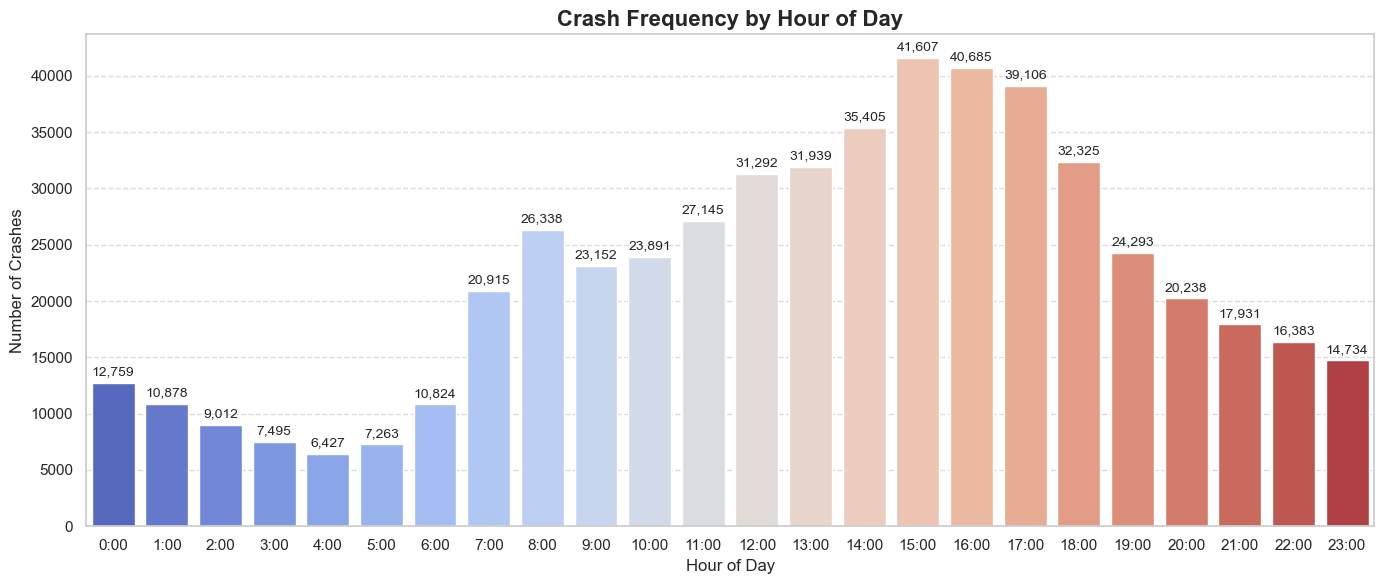

In [19]:
# Count crashes per hour
hour_counts = df_cleaned['CRASH_HOUR'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm')

# Add annotations to each bar
for i, v in enumerate(hour_counts.values):
    ax.text(i, v + max(hour_counts.values)*0.01, f'{int(v):,}', 
            ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Crash Frequency by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)

# Customize x-axis ticks (24-hour format)
plt.xticks(ticks=range(24), labels=[f'{i}:00' for i in range(24)])

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize layout
plt.tight_layout()

# Show plot
plt.show()


### 7. Weather Conditions During Crashes

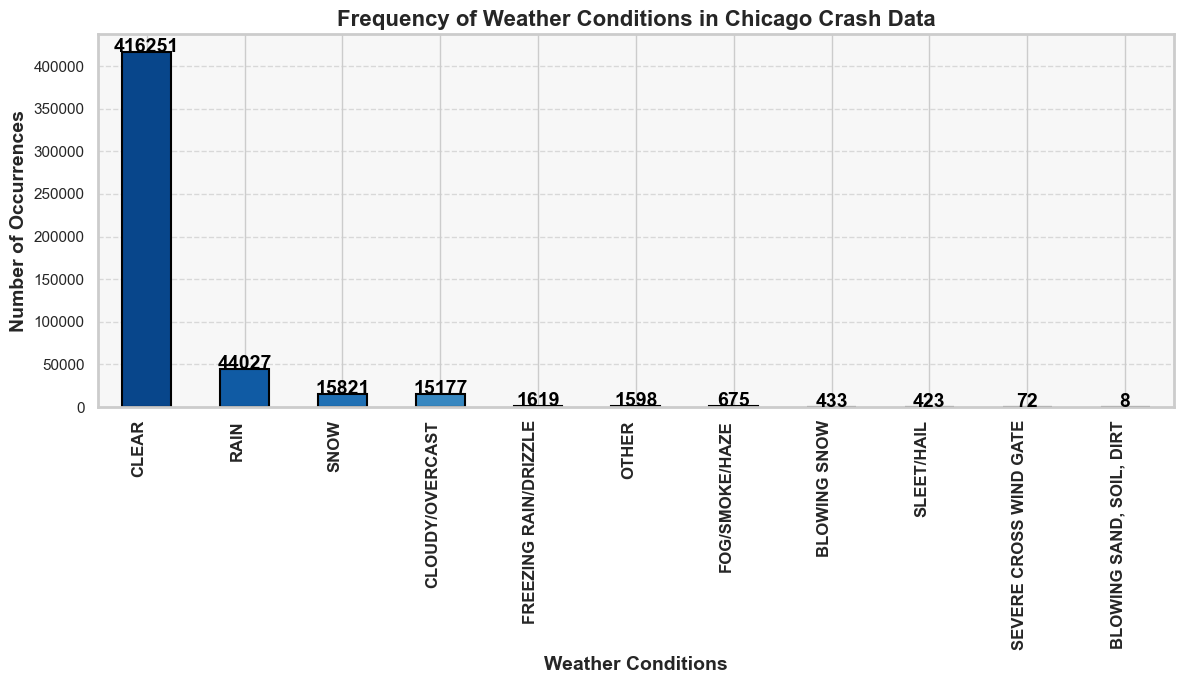

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each weather condition
weather_counts = df_cleaned['WEATHER_CONDITION'].value_counts()

# Drop "Unknown" from the dataset
weather_counts = weather_counts.drop("UNKNOWN", errors='ignore')

# Define shades of blue from dark to light
blue_shades = list(reversed(sns.color_palette("Blues", len(weather_counts))))

# Create a bar chart with improved aesthetics
plt.figure(figsize=(12, 7))
bars = weather_counts.plot(kind='bar', color=blue_shades, edgecolor='black', linewidth=1.5)

# Add labels to each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,  # Position text on top of the bar
             str(int(bar.get_height())),  # Display count as integer
             ha='center', fontsize=14, color='black', fontweight='bold')

# Labels and title with enhanced styling
plt.xlabel("Weather Conditions", fontsize=14, fontweight='bold')
plt.ylabel("Number of Occurrences", fontsize=14, fontweight='bold')
plt.title("Frequency of Weather Conditions in Chicago Crash Data", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=12, fontweight='bold')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a background color to the plot area
plt.gca().set_facecolor('#f7f7f7')

# Add border around the plot
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Show the plot
plt.tight_layout()
plt.show()


## Modeling

In [21]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [22]:
!pip install prophet

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet

In [24]:
predictors = ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 
              'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 
              'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 
              'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 
              'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 
              'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 
              'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 
              'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 
              'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']
outcome = 'MOST_SEVERE_INJURY'

In [25]:
# Remove 'Unknown' class from target variable
df_cleaned = df_cleaned[df_cleaned['MOST_SEVERE_INJURY'] != 'Unknown']
# Define predictors and outcome from the filtered dataset
X = df_cleaned[predictors]
y = df_cleaned[outcome]

In [26]:
# Encode categorical target
le = LabelEncoder()
df_cleaned[outcome] = le.fit_transform(df_cleaned[outcome])
class_names = le.classes_

In [27]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Encode categorical columns
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

# Now apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

C:\Users\kotam\AppData\Local\Temp\ipykernel_85340\450068170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = encoder.fit_transform(X[categorical_cols])


In [28]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


In [29]:
# SCALE FEATURES 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
def evaluate_model(model, X, y_true, model_name):
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

    y_pred = model.predict(X)

    try:
        y_true_labels = le.inverse_transform(y_true)
        y_pred_labels = le.inverse_transform(y_pred)
    except:
        y_true_labels = y_true
        y_pred_labels = y_pred

    print(f"\n=== {model_name} Classification Report ===")
    print(classification_report(y_true_labels, y_pred_labels))

    cm = confusion_matrix(y_true_labels, y_pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

    # Increase figure size
    fig, ax = plt.subplots(figsize=(10, 8)) 
    disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
    ax.grid(False)
    plt.title(f"{model_name} Confusion Matrix", fontsize=16)
    plt.tight_layout()
    plt.show()


### Multinomial Logistic Regression

In [31]:
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', max_iter=3000, random_state=42)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000,
                   multi_class='multinomial', random_state=42)


=== Multinomial Logistic Regression Classification Report ===
                          precision    recall  f1-score   support

                   FATAL       0.47      0.69      0.56     89802
   INCAPACITATING INJURY       0.31      0.23      0.26     89802
 NO INDICATION OF INJURY       1.00      0.83      0.91     89802
NONINCAPACITATING INJURY       0.30      0.20      0.24     89802
   REPORTED, NOT EVIDENT       0.41      0.52      0.46     89802

                accuracy                           0.49    449010
               macro avg       0.50      0.49      0.49    449010
            weighted avg       0.50      0.49      0.49    449010



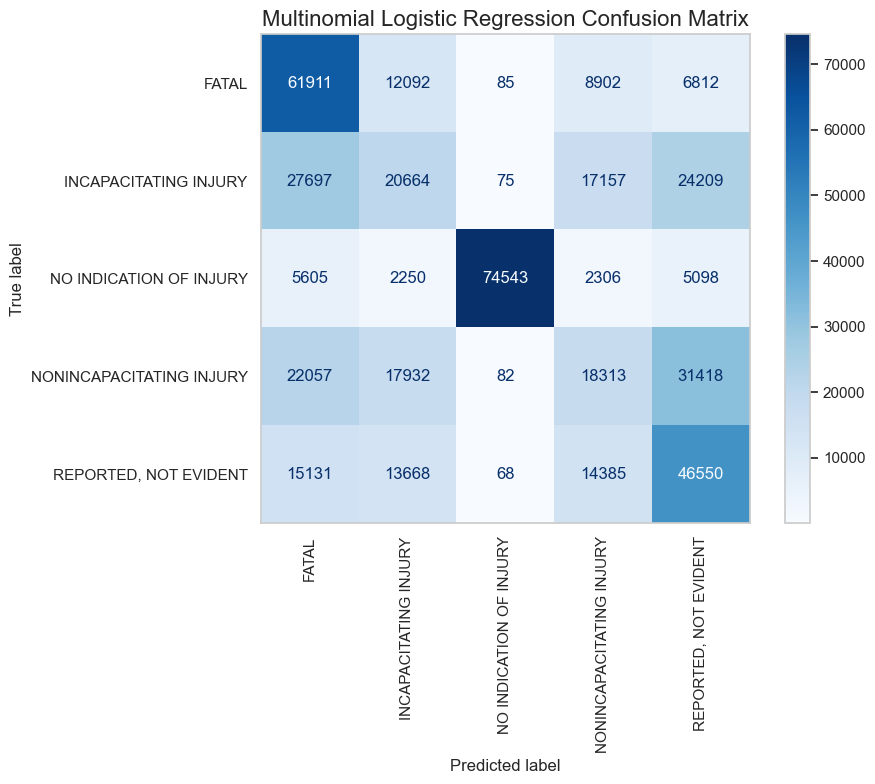

In [32]:
evaluate_model(log_model, X_test_scaled, y_test, "Multinomial Logistic Regression")

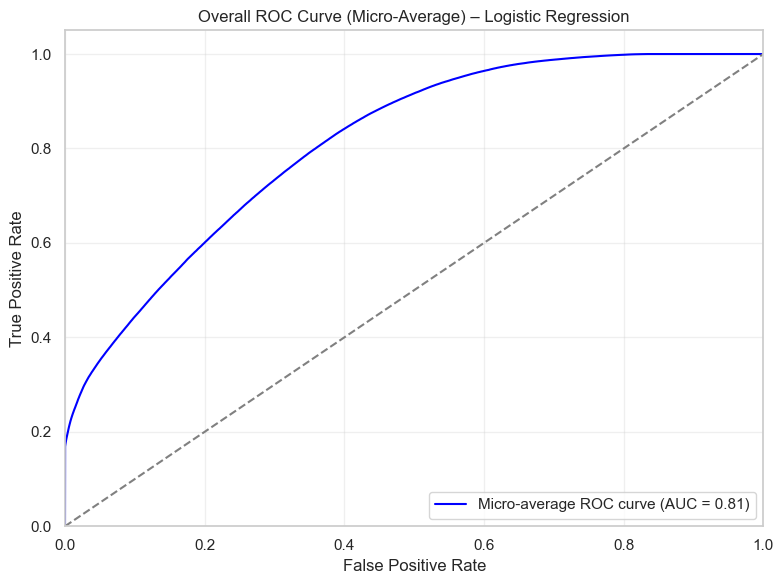

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# === Binarize the test labels ===
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # shape: (n_samples, n_classes)
n_classes = y_test_bin.shape[1]

# === Train One-vs-Rest Logistic Regression model ===
ovr_log_model = OneVsRestClassifier(
    LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=3000, random_state=42)
)
ovr_log_model.fit(X_train_scaled, label_binarize(y_train, classes=np.unique(y_train)))
y_score = ovr_log_model.predict_proba(X_test_scaled)

# === Compute micro-average ROC curve and AUC ===
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# === Plot ROC Curve ===
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='blue',
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve (Micro-Average) – Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

17:55:36 - cmdstanpy - INFO - Chain [1] start processing
17:55:38 - cmdstanpy - INFO - Chain [1] done processing


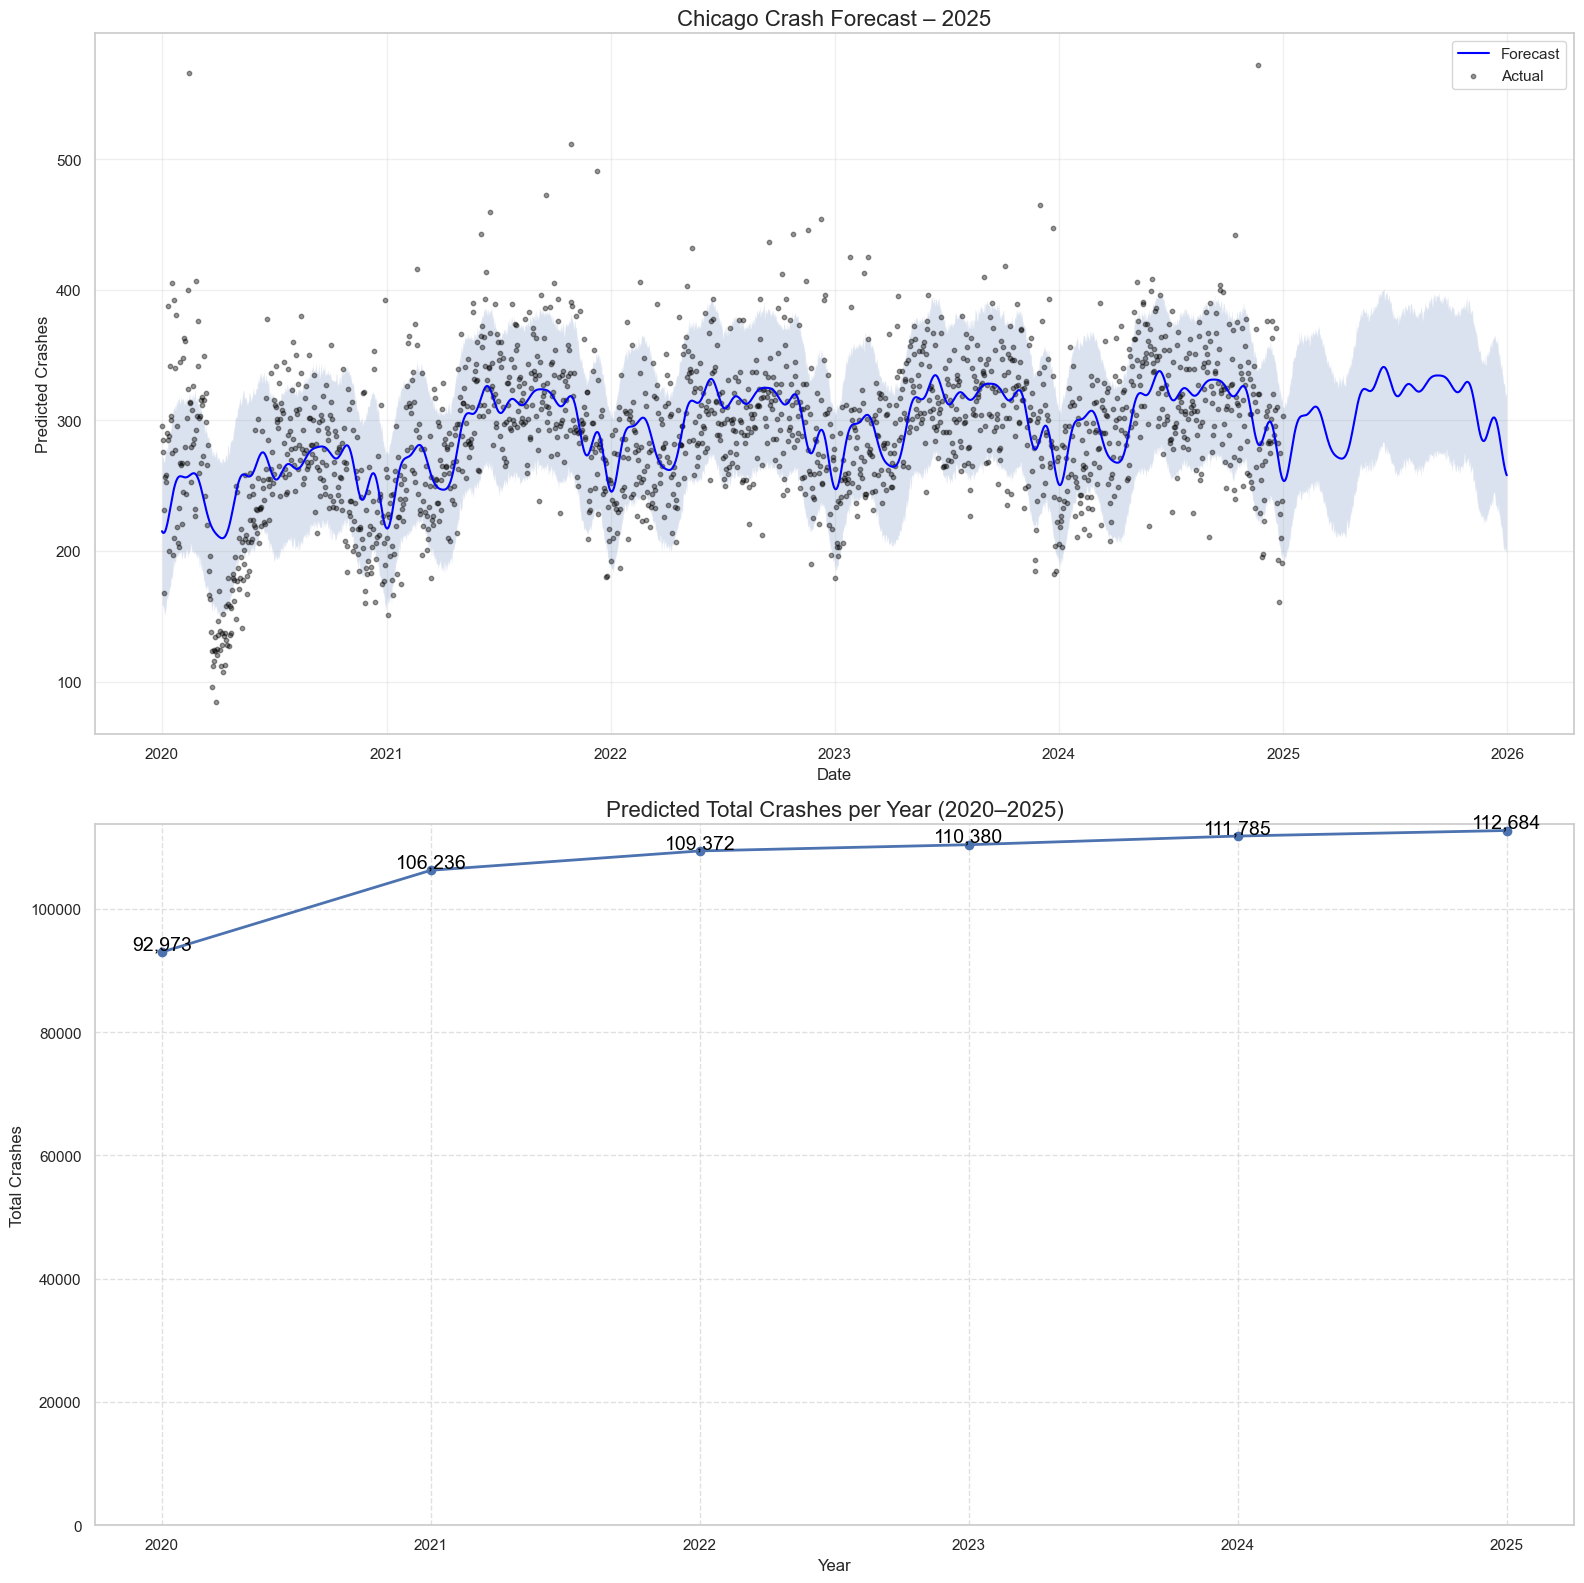

In [34]:
# Convert CRASH_DATE to datetime
df_cleaned['CRASH_DATE'] = pd.to_datetime(df_cleaned['CRASH_DATE'])

# Daily aggregation
daily_crashes = df_cleaned.groupby(df_cleaned['CRASH_DATE'].dt.date).size().reset_index(name='crash_count')
daily_crashes.columns = ['ds', 'y']
daily_crashes['ds'] = pd.to_datetime(daily_crashes['ds'])

# Filter for 2020–2024
daily_crashes = daily_crashes[(daily_crashes['ds'].dt.year >= 2020) & (daily_crashes['ds'].dt.year <= 2024)]

# Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(daily_crashes)

# Forecast for 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Yearly aggregation
forecast['year'] = forecast['ds'].dt.year
yearly_forecast = forecast.groupby('year')['yhat'].sum().reset_index()

# Create vertically stacked plots
fig, axs = plt.subplots(2, 1, figsize=(16, 16))  # Increased height

# Top: Forecast line
axs[0].plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
axs[0].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2)
axs[0].scatter(daily_crashes['ds'], daily_crashes['y'], color='black', alpha=0.4, s=10, label='Actual')
axs[0].set_title("Chicago Crash Forecast – 2025", fontsize=16)
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Predicted Crashes")
axs[0].legend()
axs[0].grid(True, alpha=0.3)

# Bottom: Yearly totals with Y-axis starting at 0 and point labels
axs[1].plot(yearly_forecast['year'], yearly_forecast['yhat'], marker='o', linewidth=2)
axs[1].set_title("Predicted Total Crashes per Year (2020–2025)", fontsize=16)
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Total Crashes")
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].set_xticks(yearly_forecast['year'])
axs[1].set_ylim(bottom=0)  # Start y-axis at 0

# Add value labels on each point
for x, y in zip(yearly_forecast['year'], yearly_forecast['yhat']):
    axs[1].text(x, y + 500, f'{int(y):,}', ha='center', fontsize=14, color='black')  # adjust y+500 as needed

plt.tight_layout()

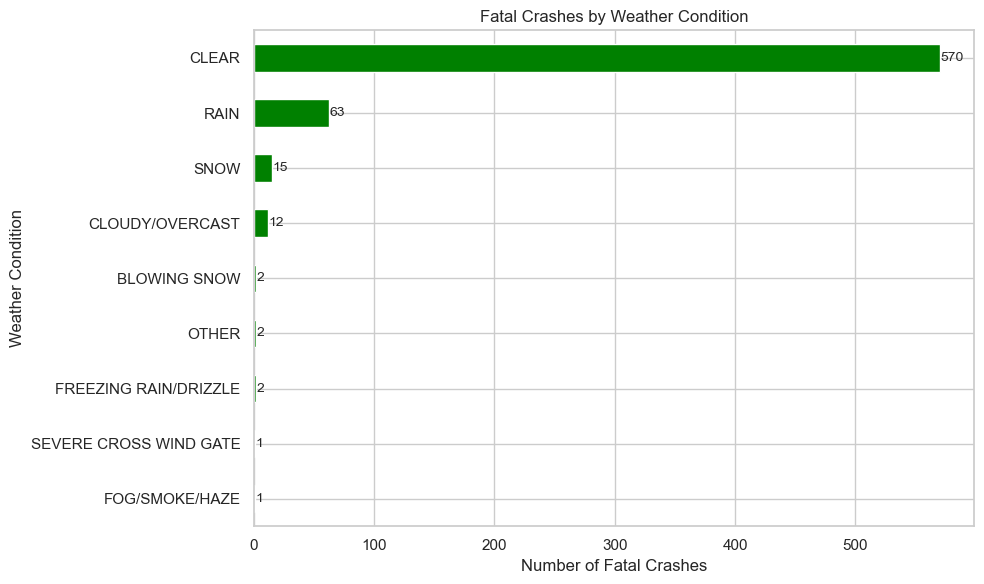

In [35]:
# Filter fatal crashes (assuming 0 = 'FATAL INJURY')
fatal_df = df_cleaned[df_cleaned['MOST_SEVERE_INJURY'] == 0]

# Count fatal crashes by weather condition
fatal_counts = fatal_df['WEATHER_CONDITION'].value_counts().drop('UNKNOWN', errors='ignore')

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
ax = fatal_counts.sort_values().plot(kind='barh', color='green')

plt.xlabel('Number of Fatal Crashes')
plt.ylabel('Weather Condition')
plt.title('Fatal Crashes by Weather Condition')

# Add value labels to the bars
for i, value in enumerate(fatal_counts.sort_values()):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()


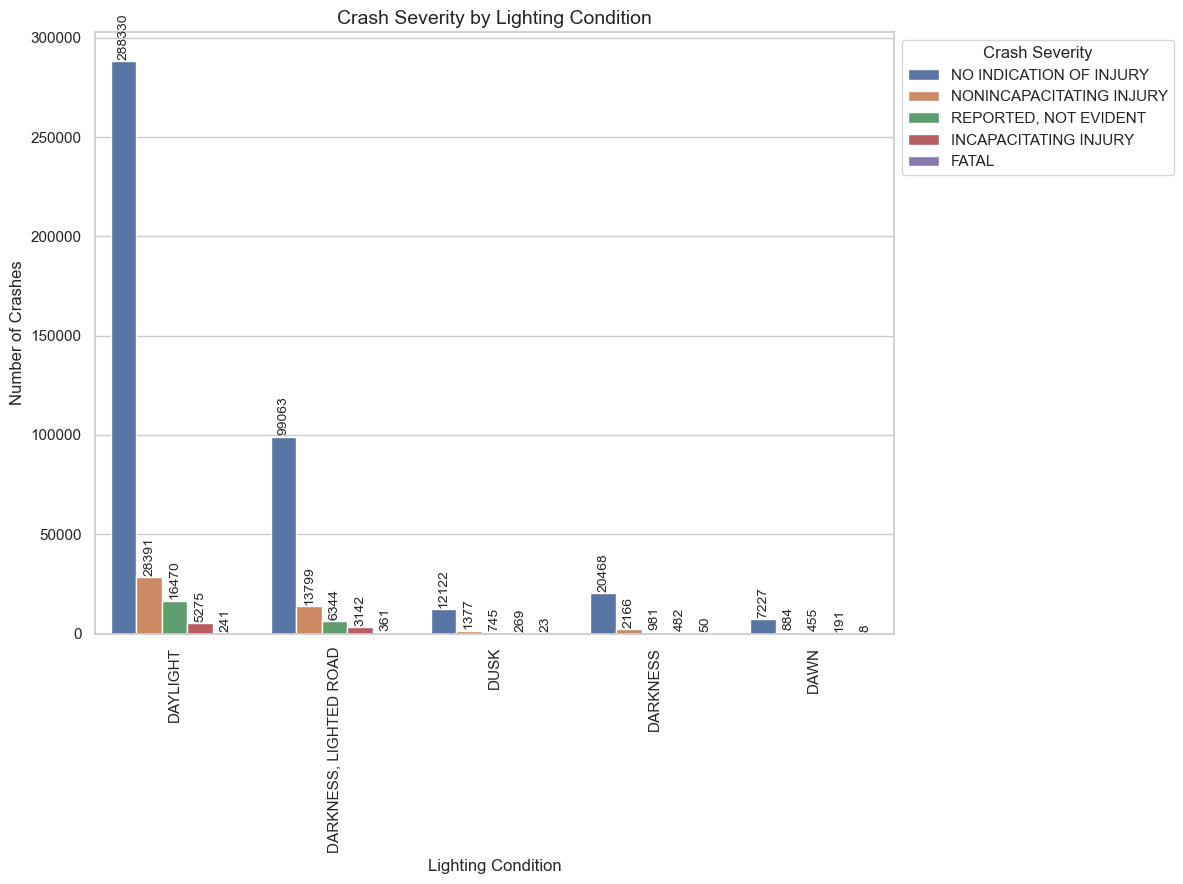

In [36]:
# Apply both filters together
filtered_df = df[
    (df['LIGHTING_CONDITION'].astype(str).str.upper() != 'UNKNOWN') &
    (df['MOST_SEVERE_INJURY'].astype(str).str.upper() != 'UNKNOWN')
]

# Plot
plt.figure(figsize=(12, 9))
ax = sns.countplot(data=filtered_df, x='LIGHTING_CONDITION', hue='MOST_SEVERE_INJURY')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=1, rotation=90)

# Styling
plt.title('Crash Severity by Lighting Condition', fontsize=14)
plt.xlabel('Lighting Condition', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.legend(title='Crash Severity', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### XGBoost Classifier

In [37]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Label encoding
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Model training
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train_scaled, y_train_encoded)


C:\Users\kotam\anaconda4\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)


=== XGBoost Classifier Classification Report ===
                          precision    recall  f1-score   support

                   FATAL       0.86      0.96      0.91     89802
   INCAPACITATING INJURY       0.61      0.60      0.60     89802
 NO INDICATION OF INJURY       0.92      0.95      0.94     89802
NONINCAPACITATING INJURY       0.54      0.46      0.50     89802
   REPORTED, NOT EVIDENT       0.60      0.60      0.60     89802

                accuracy                           0.72    449010
               macro avg       0.71      0.72      0.71    449010
            weighted avg       0.71      0.72      0.71    449010



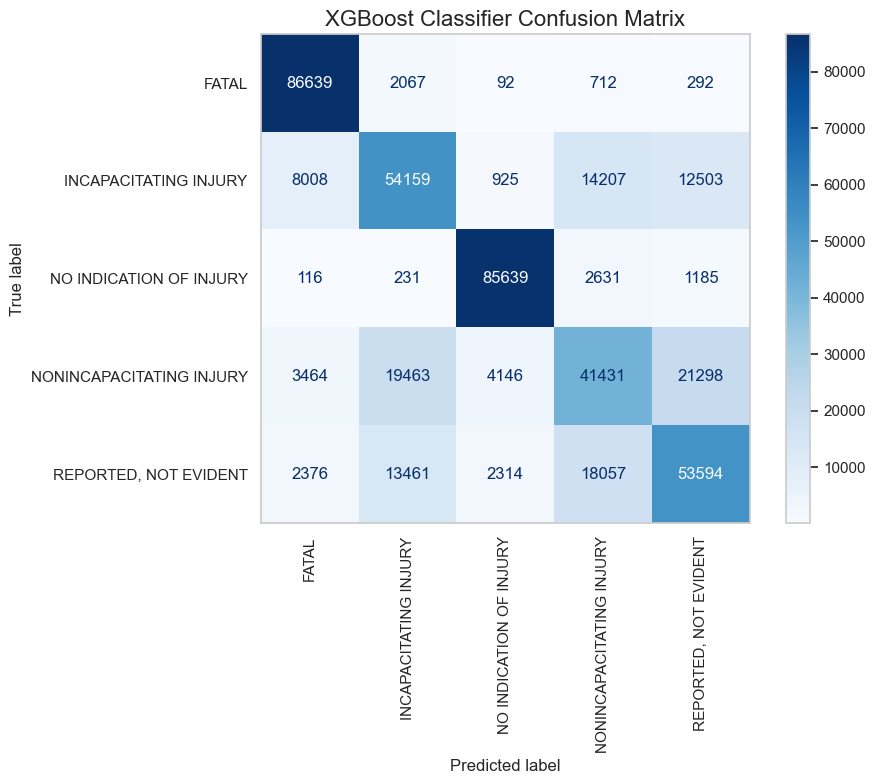

In [38]:
# --- 8. Evaluate the Model ---
evaluate_model(xgb_model, X_test_scaled, y_test_encoded, "XGBoost Classifier")


C:\Users\kotam\AppData\Local\Temp\ipykernel_85340\36871268.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features['Importance'], y=top_10_features['Feature'], palette="coolwarm")


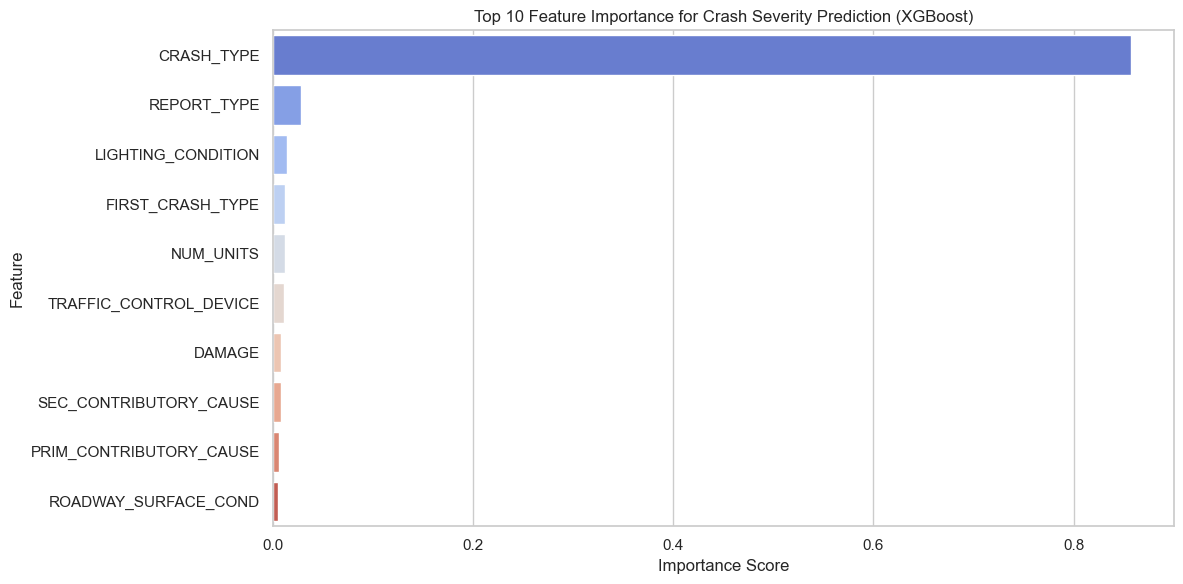

In [39]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
})
top_10_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_features['Importance'], y=top_10_features['Feature'], palette="coolwarm")
plt.title("Top 10 Feature Importance for Crash Severity Prediction (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()